In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 448 kB 46.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from konlpy.tag import Okt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
okt = Okt()
import matplotlib.font_manager as fm
import re
from PIL import Image
from io import BytesIO 
from datetime import datetime
from collections import Counter

In [ ]:
labels = ['title','question','answer','date','agency','code','category','address']
raw_data = pd.read_csv('/content/drive/MyDrive/국민권익위원회 경진 대회 데이터.csv',encoding='utf-8')
raw_data.head()

In [ ]:
data_q = raw_data['질문내용']
data_q_tolist = data_q.values.tolist()
data_q_list = ''
for i in data_q_tolist:
  data_q_list += str(i)
data_q_nouns = okt.nouns(data_q_list)
data_q_n = ''
for i in data_q_nouns:
  data_q_n += i+' '
data_q_nouns_count = Counter(data_q_nouns)

In [ ]:
data_q_nouns_count.most_common(30)

[('경우', 8554),
 ('수', 8305),
 ('신청', 6295),
 ('및', 6293),
 ('것', 5731),
 ('신고', 5434),
 ('알', 5200),
 ('하나요', 4961),
 ('등', 4917),
 ('제', 4710),
 ('무엇', 4676),
 ('사업', 4580),
 ('시', 4494),
 ('시설', 4460),
 ('방법', 4349),
 ('관련', 4317),
 ('문의', 3991),
 ('사용', 3894),
 ('학교', 3292),
 ('대해', 3210),
 ('기준', 3188),
 ('관리', 3149),
 ('처리', 3122),
 ('변경', 3081),
 ('등록', 3080),
 ('절차', 3051),
 ('허가', 2980),
 ('대한', 2890),
 ('설치', 2831),
 ('내용', 2785)]

In [ ]:
stopwords = set(STOPWORDS)
# stopwords.update(['경우','문의','현재','해당','무엇','대한','사용','대해','기준','확인','하나요','관련','사람','방법','대하','신청','세부내용','처리여부','이용','이상','언제','위해','생각','설치','세부 내용','세부','내용'])

In [ ]:
circle_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/circle_img.jpg'))

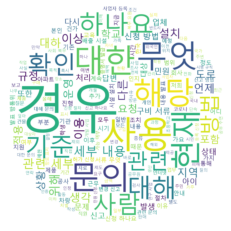

In [ ]:
wd_data_q = WordCloud(background_color = "white",max_font_size=250,mask=circle_mask,
                          font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(data_q_n)
fig = plt.figure()
plt.imshow(wd_data_q, interpolation='bilinear')
plt.axis('off')
wd_data_q.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_data_q3.jpg')

In [ ]:
sample_data = raw_data

In [ ]:
sample_data['등록일시']=sample_data['1']+" "+sample_data['2']
sample_data.drop(['1','2'],axis=1,inplace=True)
sample_data.head()

In [ ]:
sample_data['일시']=pd.to_datetime(sample_data['일시'],infer_datetime_format=True,errors='coerce')

In [ ]:
sample_data['등록일시']=pd.to_datetime(sample_data['등록일시'],infer_datetime_format=True,errors='coerce')

In [ ]:
sample_data['시 분']=sample_data['일시'].dt.time
sample_data['요일']=sample_data['등록일시'].dt.day_name()
sample_data.head()

In [ ]:
sorted(sample_data['시 분'],reverse=True)

In [ ]:
sample_data_Mon=sample_data[sample_data['요일']=="Monday"]
sample_data_Tue=sample_data[sample_data['요일']=="Tuesday"]
sample_data_Wed=sample_data[sample_data['요일']=="Wednesday"]
sample_data_Thu=sample_data[sample_data['요일']=='Thursday']
sample_data_Fri=sample_data[sample_data['요일']=="Friday"]
sample_data_Sat=sample_data[sample_data['요일']=="Saturday"]
sample_data_Sun=sample_data[sample_data['요일']=="Sunday"]

In [ ]:
sdM_q = sample_data_Mon['질문내용']
sdM_q_tolist = sdM_q.values.tolist()
sdM_q_list = ''
for i in sdM_q_tolist:
  sdM_q_list += str(i)
sdM_q_nouns = okt.nouns(sdM_q_list)
sdM_q_n = ''
for i in sdM_q_nouns:
  sdM_q_n += i+' '
sdM_q_nouns_count = Counter(sdM_q_nouns)

In [ ]:
sdM_q_nouns_count.most_common(30)

[('수', 1319),
 ('경우', 1177),
 ('신청', 1056),
 ('것', 944),
 ('및', 877),
 ('알', 850),
 ('제', 811),
 ('하나요', 793),
 ('신고', 748),
 ('등', 746),
 ('관련', 709),
 ('문의', 701),
 ('무엇', 689),
 ('시', 666),
 ('방법', 644),
 ('사용', 615),
 ('학교', 599),
 ('사업', 584),
 ('등록', 556),
 ('대해', 540),
 ('절차', 502),
 ('변경', 500),
 ('내용', 484),
 ('서류', 472),
 ('관리', 459),
 ('확인', 442),
 ('후', 440),
 ('발급', 426),
 ('기준', 408),
 ('중', 401)]

In [ ]:
sdT_q = sample_data_Tue['질문내용']
sdT_q_tolist = sdT_q.values.tolist()
sdT_q_list = ''
for i in sdT_q_tolist:
  sdT_q_list += str(i)
sdT_q_nouns = okt.nouns(sdT_q_list)
sdT_q_n = ''
for i in sdT_q_nouns:
  sdT_q_n += i+' '
sdT_q_nouns_count = Counter(sdT_q_nouns)

In [ ]:
sdT_q_nouns_count.most_common(30)

In [ ]:
sdW_q = sample_data_Wed['질문내용']
sdW_q_tolist = sdW_q.values.tolist()
sdW_q_list = ''
for i in sdW_q_tolist:
  sdW_q_list += str(i)
sdW_q_nouns = okt.nouns(sdW_q_list)
sdW_q_n = ''
for i in sdW_q_nouns:
  sdW_q_n += i+' '
sdW_q_nouns_count = Counter(sdW_q_nouns)

In [ ]:
sdW_q_nouns_count.most_common(30)

In [ ]:
sdTh_q = sample_data_Thu['질문내용']
sdTh_q_tolist = sdTh_q.values.tolist()
sdTh_q_list = ''
for i in sdTh_q_tolist:
  sdTh_q_list += str(i)
sdTh_q_nouns = okt.nouns(sdTh_q_list)
sdTh_q_n = ''
for i in sdTh_q_nouns:
  sdTh_q_n += i+' '
sdTh_q_nouns_count = Counter(sdTh_q_nouns)

In [ ]:
sdTh_q_nouns_count.most_common(30)

In [ ]:
sdF_q = sample_data_Fri['질문내용']
sdF_q_tolist = sdF_q.values.tolist()
sdF_q_list = ''
for i in sdF_q_tolist:
  sdF_q_list += str(i)
sdF_q_nouns = okt.nouns(sdF_q_list)
sdF_q_n = ''
for i in sdF_q_nouns:
  sdF_q_n += i+' '
sdF_q_nouns_count = Counter(sdF_q_nouns)

In [ ]:
sdF_q_nouns_count.most_common(30)

In [ ]:
sdS_q = sample_data_Sat['질문내용']
sdS_q_tolist = sdS_q.values.tolist()
sdS_q_list = ''
for i in sdS_q_tolist:
  sdS_q_list += str(i)
sdS_q_nouns = okt.nouns(sdS_q_list)
sdS_q_n = ''
for i in sdS_q_nouns:
  sdS_q_n += i+' '
sdS_q_nouns_count = Counter(sdS_q_nouns)

In [ ]:
sdS_q_nouns_count.most_common(30)

In [ ]:
sdSu_q = sample_data_Sun['질문내용']
sdSu_q_tolist = sdSu_q.values.tolist()
sdSu_q_list = ''
for i in sdSu_q_tolist:
  sdSu_q_list += str(i)
sdSu_q_nouns = okt.nouns(sdSu_q_list)
sdSu_q_n = ''
for i in sdSu_q_nouns:
  sdSu_q_n += i+' '
sdSu_q_nouns_count = Counter(sdSu_q_nouns)

In [ ]:
sdSu_q_nouns_count.most_common(30)

In [ ]:
# 시간대별 민원 내용
# 다수 민원키워드 답변키워드 : 텍스트 분석해서 많은 것들 필터링
# 요일별 민원키워드